# Machine Learning: Assignment 1 
## k Nearest Neighbors (max. 8p)

### Assignment 1.0: Send the Repository URL address to the teacher.

* Send the URL address of your repository to the teacher.
* Also, you should set the access to the repository to at least **Developer** level for the teacher.

Don't forget to enter your information in the cell below.

In [1]:
# Write your information here!
student_name = 'Burak Dogan'
student_id = 'AB0971'

## Assignment 1.1
### Topic: Data preprocessing (2 points)

1. Check out the *Congressional Voting Records Data Set* at [https://archive.ics.uci.edu/dataset/105/congressional+voting+records](https://archive.ics.uci.edu/dataset/105/congressional+voting+records).
   * *"This data set includes votes for each of the U.S. House of Representatives Congressmen on the 16 key votes identified by the CQA.  The CQA lists nine different types of votes: voted for, paired for, and announced for (these three simplified to yea), voted against, paired against, and announced against (these three simplified to nay), voted present, voted present to avoid conflict of interest, and did not vote or otherwise make a position known (these three simplified to an unknown disposition)."*

2. Download the dataset from https://archive.ics.uci.edu/dataset/105/congressional+voting+records](https://archive.ics.uci.edu/dataset/105/congressional+voting+records). 
   * save the data file in your local computer in the same directory as this Jupyter Notebook file.

3. Load the data into the **Pandas DataFrame**. Also set the columns according to the "Attribute Information" section of the resource documentation. 
   * Rename the class variable (party column) with the label `party`.

4. Preprocess the data:
   * In the data `y == yes, n == no, ? == not answered`.
   * Convert the y and n answers to numeric values. (`y=1, n=-1`)
   * Also replaces "no answer" text which is marked with question marks. (`? = 0`)
     
      

In [1]:
# TODO: Write your implementation in this cell. 
# TODO: Store your answer in the df variable.
import pandas as pd

# TODO: Load The data. Note! There is no header line in the .data file
df = pd.read_csv('house-votes-84.data')

# TODO: Rename the columns.
df.columns = ['party', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze',
             'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missle', 
             'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports',
             'export-administration-act-south-africa']

# TODO: Convert responses to numerical values (yes = 1 etc.).
# TODO: Replace "no answer" fields.
df.replace({'y': 1, 'n': -1, '?': 0}, inplace=True)

print(df)

          party  handicapped-infants  water-project-cost-sharing  \
0    republican                   -1                           1   
1      democrat                    0                           1   
2      democrat                   -1                           1   
3      democrat                    1                           1   
4      democrat                   -1                           1   
..          ...                  ...                         ...   
429  republican                   -1                          -1   
430    democrat                   -1                          -1   
431  republican                   -1                           0   
432  republican                   -1                          -1   
433  republican                   -1                           1   

     adoption-of-the-budget-resolution  physician-fee-freeze  el-salvador-aid  \
0                                   -1                     1                1   
1                    

In [2]:
# TODO: Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# TODO: Save the DataFrame to the df variable.
print(f'Number of rows: {len(df)}')
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

# TODO: Uncomment the following two lines
print(f'anti-satellite-test-ban unique values: {df["anti-satellite-test-ban"].unique()}')
print(f'export-administration-act-south-africa unique values: {df["export-administration-act-south-africa"].unique()}')

# Print the number of rows
print(f'Number of rows {df.any(axis=1).sum()}')

Number of rows: 434
Columns: Index(['party', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missle',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')
First row by position: party                                     republican
handicapped-infants                               -1
water-project-cost-sharing                         1
adoption-of-the-budget-resolution                 -1
physician-fee-freeze                               1
el-salvador-aid                                    1
religious-groups-in-schools                        1
anti-satellite-test-ban                           -1
aid-to-nicaraguan-contras                  

## Assignment 1.2
### Topic: Data visualization (2 points)

With the help of the visualized figure, can you notice the difference in the voting behavior of the different parties?

Use the DataFrame from the previous assignment.

Draw a **heatmap** from the data, showing first the Republicans and then the Democrats next to each other. So the *congressmen* are the rows and the *legal issues* are the columns.

Remember that a clear figure also includes named axes and a graph title.

* Tip: you can use, for example, the [heatmap descriptor](https://seaborn.pydata.org/generated/seaborn.heatmap.html) from the `seaborn` library.
* Hint: it makes sense to drop the class variable for this image (see `df.drop()`).
* Tip: the color scale can be named with the heatmap parameter `cbar_kws={'label': 'write your own'}`.

In [3]:
%%capture

import seaborn as sns
import matplotlib.pyplot as plt
# TODO: Write your implementation code in this cell.
# TODO: Sort the rows.

df_republican = df[df['party'] == 'republican'].drop(columns='party')
df_democrat = df[df['party'] == 'democrat'].drop(columns='party')

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(df_republican, cmap='viridis', cbar_kws={'label': 'Voting Behaviour'}, ax=ax[0])
ax[0].set_title('Republican Party')

sns.heatmap(df_democrat, cmap='viridis', cbar_kws={'label': 'Voting Behaviour'}, ax=ax[1])
ax[1].set_title('Democrat Party')

fig.suptitle('Legal Issues Responses of Republicans and Democrats Heatmap')

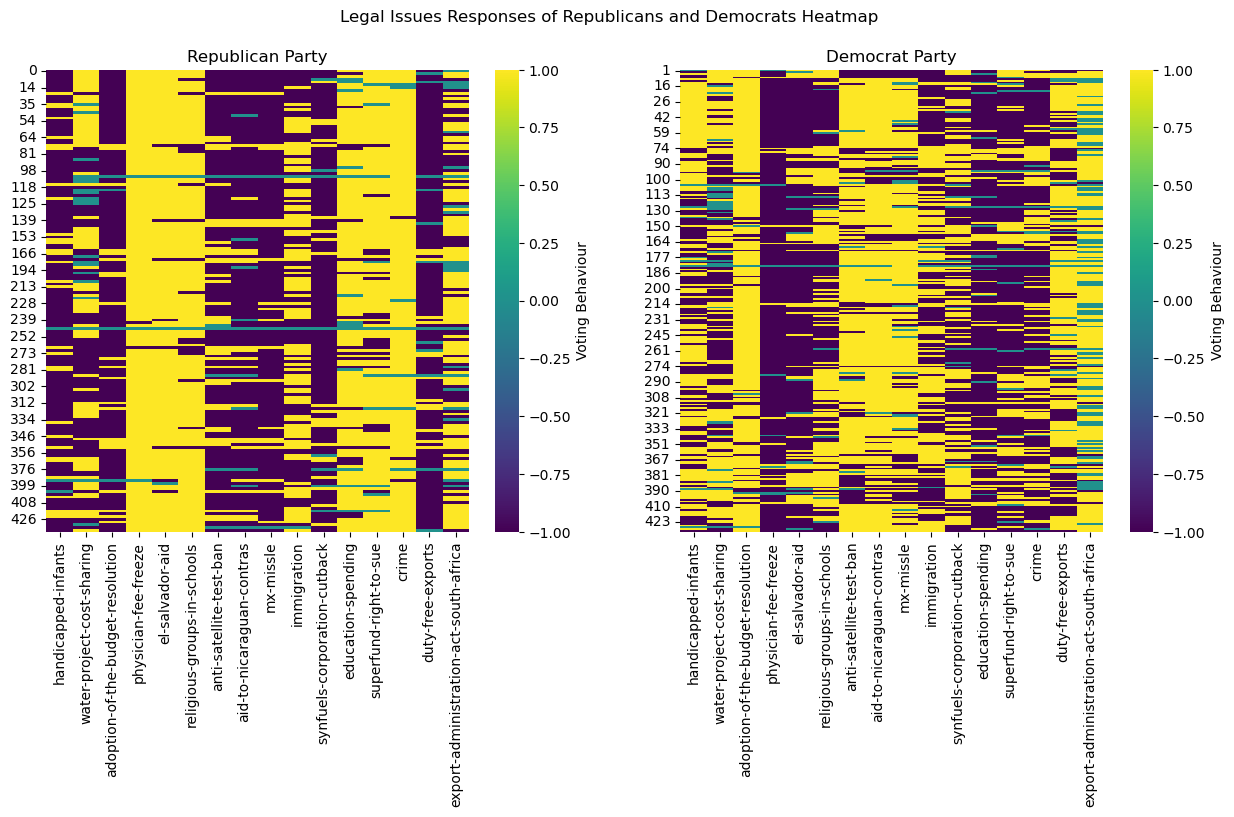

In [4]:
# TODO: Draw the heatmap.
# TODO: Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# TODO: Make your answer so that the result of this cell shows the diagram below. Store the figure in the variable ax so that ax.figure shows below it.

ax[0].figure

## Assignment 1.3
### Topic: kNN classifier (4 points)

Use the scikit-learn library's [kNN classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to find the congressman in the dataset that is closest to the person being searched for.

Be sure to drop the class variable (**Party**).

Below are the questions to be given in this assignment

1. Find a congressman who would answer `y` to all legal questions. Save the following information about the Congressman found to these variables:
   * which party he is closest to: `yes_man_party`
   * with what probability he represents this party: `yes_man_proba`
  
2. Find a congressman who would answer the legal questions as follows: `y,y,y,n,n,n,n,y,y,n,y,n,n,y,y,y`.
   * Save the answers in the respective variables `mystery_man_proba` (probability) and `mystery_man_party` (party).

3. Find a congressman who is 100% sure to be a member of the republican party:.
   * Save the answers in the respective variables `re_man_proba` (probability) and `re_man_party` (party).

Tip: when you create the vector of the person who answered all with y, it should be a list of lists: e.g. if there were four variables, `[[1,1,1,1...,1]]` (we have more variables here, so in the answer the vector is longer).

Tip: remember to drop the class variable when training the classifier.

In [7]:
%%capture

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# TODO: Write your implementation in this cell.
yes_man_party = myst_man_party = re_man_party = None
yes_man_proba = myst_man_proba = re_man_proba = None

# TODO: Use the kNN model to find the Congressman closest to the type of person being searched.

X = df.drop(columns='party')
y = df['party']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Train the classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Find the 'Yes Man'
yes_man_vector = [[1] * len(X.columns)] # Vector for representing 'y' to all votes.
yes_man_party = knn_classifier.predict(yes_man_vector)[0]
yes_man_proba = knn_classifier.predict_proba(yes_man_vector).max()

# Congressman (mystery) with Specific answer
myst_man_vector = [[1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1]]  # Vector for specific answers
myst_man_party = knn_classifier.predict(myst_man_vector)[0]
myst_man_proba = knn_classifier.predict_proba(myst_man_vector).max()

# Republican
re_man_vector = [[-1, -1, -1, 1, 1, 1, -1, -1, -1, 0, -1, 1, 1, 1, -1, 1]]
re_man_party = knn_classifier.predict(re_man_vector)[0]
re_man_proba = knn_classifier.predict_proba(re_man_vector).max()


In [8]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# TODO: Save the results in these variables.
print(f"yes man: {yes_man_party} {yes_man_proba}")
print(f"mystery man: {myst_man_party} {myst_man_proba}")
print(f"rebuplican man: {re_man_party} {re_man_proba}")

yes man: republican 0.6
mystery man: democrat 1.0
rebuplican man: republican 1.0


# Analysis

## Heat Map

There is a patter in the votes of congress. Over all view show, rebuplican and democrat votes complement each other. In other words. Republicans vote fpr  what democrats vote against. Also republican votes seem to be more structured whereas democrat votes are quite "mixed"

## Finding Congress person from votes

According to results:
- Yes man is by 60% probability a republican
- Mystery man is 100% probability a democrat
- Republican man is 100% republican probability a republican

The way I approached the question of finding the "republican man" is, by looking at the heat map of republican votes and build votes according to what republican parties give.